In [1]:
import pandas as pd 

GO_raw = pd.read_table('/home/qbio1/shjoo06/p/project1/uniprot-organism__Mus+musculus_.tab')
GO_edited = GO_raw[(GO_raw['Organism'] == "Mus musculus (Mouse)")]
GO_edited = GO_edited.dropna(axis=0)
GO_edited.reset_index(drop=True,inplace=True)

GO_edited['transcript id'] = GO_edited['Ensembl transcript'].apply(lambda x: x.split(';')[0].split(' [')[0])

GO_txid = GO_edited[['Gene ontology (cellular component)','transcript id']]
GO_txid

,Gene ontology (cellular component),transcript id
0,Atg12-Atg5-Atg16 complex [GO:0034274]; autopha...,ENSMUST00000039286
1,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ENSMUST00000112751
2,autophagosome [GO:0005776]; cytoplasm [GO:0005...,ENSMUST00000130916
3,cytosol [GO:0005829]; membrane raft [GO:004512...,ENSMUST00000226593
4,cytosol [GO:0005829]; early endosome membrane ...,ENSMUST00000094782
...,...,...
33871,axon [GO:0030424]; cytosol [GO:0005829]; dendr...,ENSMUST00000182958
33872,anchored component of membrane [GO:0031225]; p...,ENSMUST00000118860
33873,cytoplasmic ribonucleoprotein granule [GO:0036...,ENSMUST00000082183
33874,nucleus [GO:0005634],ENSMUST00000088696


In [2]:
gene_tx_id = pd.read_table('/home/qbio1/shjoo06/p/project1/reference_data/annotated_geneid_transcriptid.txt',\
                           sep=' ',names=['gene id','transcript id_raw'])
df_id = pd.DataFrame(gene_tx_id)
df_id['transcript id'] = df_id['transcript id_raw'].apply(lambda x: x.split('.')[0])

df_id

,gene id,transcript id_raw,transcript id
0,ENSMUSG00000102693.2,ENSMUST00000193812.2,ENSMUST00000193812
1,ENSMUSG00000064842.3,ENSMUST00000082908.3,ENSMUST00000082908
2,ENSMUSG00000051951.6,ENSMUST00000162897.2,ENSMUST00000162897
3,ENSMUSG00000051951.6,ENSMUST00000159265.2,ENSMUST00000159265
4,ENSMUSG00000051951.6,ENSMUST00000070533.5,ENSMUST00000070533
...,...,...,...
142430,ENSMUSG00000095475.2,ENSMUST00000180208.2,ENSMUST00000180208
142431,ENSMUSG00000094855.2,ENSMUST00000178327.2,ENSMUST00000178327
142432,ENSMUSG00000095019.2,ENSMUST00000178569.2,ENSMUST00000178569
142433,ENSMUSG00000095041.8,ENSMUST00000179505.8,ENSMUST00000179505


In [3]:
df_GO_geneid = pd.merge(GO_txid, df_id)
df_GO_geneid = df_GO_geneid[['Gene ontology (cellular component)','transcript id','gene id']]
df_GO_geneid.drop_duplicates(subset=['gene id'],inplace=True)

df_GO_geneid 

,Gene ontology (cellular component),transcript id,gene id
0,Atg12-Atg5-Atg16 complex [GO:0034274]; autopha...,ENSMUST00000039286,ENSMUSG00000038160.8
1,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ENSMUST00000112751,ENSMUSG00000057329.8
2,autophagosome [GO:0005776]; cytoplasm [GO:0005...,ENSMUST00000130916,ENSMUSG00000035086.14
3,cytosol [GO:0005829]; membrane raft [GO:004512...,ENSMUST00000226593,ENSMUSG00000022637.12
4,cytosol [GO:0005829]; early endosome membrane ...,ENSMUST00000094782,ENSMUSG00000028894.19
...,...,...,...
33814,mitochondrion [GO:0005739]; nucleus [GO:0005634],ENSMUST00000119943,ENSMUSG00000048279.20
33827,extracellular region [GO:0005576],ENSMUST00000033149,ENSMUSG00000030862.14
33855,nucleoplasm [GO:0005654],ENSMUST00000009411,ENSMUSG00000052763.8
33862,cytoplasm [GO:0005737]; nucleus [GO:0005634]; ...,ENSMUST00000096332,ENSMUSG00000062791.5


In [4]:
df_filtered = pd.read_csv("/home/qbio1/shjoo06/p/project1/alignment_data/df_filtered.csv")
df_filtered.rename(columns={'Unnamed: 0':'gene id'},inplace=True)

df_filtered

,gene id,CLIP-35L33G,RNAseq_siLin28a,RNAseq_siLuc,RNAseq_unt,RPFsiLin28a,RPFsiLuc
0,ENSMUSG00000119584.1,2613335.0,229007.0,258118.0,375707.0,5926047.0,6253431.0
1,ENSMUSG00000026234.13,53126.0,32239.0,39970.0,37017.0,3995.0,10451.0
2,ENSMUSG00000032309.16,1266.0,1458.0,1292.0,1319.0,398.0,586.0
3,ENSMUSG00000028617.11,469.0,649.0,514.0,765.0,165.0,347.0
4,ENSMUSG00000022462.8,26359.0,5506.0,5507.0,7936.0,10012.0,10003.0
...,...,...,...,...,...,...,...
7214,ENSMUSG00000025470.12,31.0,203.0,115.0,185.0,117.0,149.0
7215,ENSMUSG00000068220.7,23.0,236.0,159.0,148.0,520.0,389.0
7216,ENSMUSG00000047281.4,11.0,385.0,150.0,256.0,129.0,155.0
7217,ENSMUSG00000024446.14,9.0,199.0,103.0,185.0,364.0,356.0


In [5]:
df_merged = pd.merge(df_GO_geneid,df_filtered)

nucleus = 'GO:0005634'
integral_membrane = 'GO:0016021'
cytoplasm = 'GO:0005737'

for index, row in df_merged.iterrows():
    if nucleus in df_merged.loc[index,'Gene ontology (cellular component)']\
    and integral_membrane in df_merged.loc[index,'Gene ontology (cellular component)']:
        df_merged.drop(index,axis=0,inplace=True)
    elif nucleus in df_merged.loc[index,'Gene ontology (cellular component)']\
    and cytoplasm in df_merged.loc[index,'Gene ontology (cellular component)']:
        df_merged.drop(index,axis=0,inplace=True)
    elif integral_membrane in df_merged.loc[index,'Gene ontology (cellular component)']\
    and cytoplasm in df_merged.loc[index,'Gene ontology (cellular component)']:
        df_merged.drop(index,axis=0,inplace=True)
    elif integral_membrane not in df_merged.loc[index,'Gene ontology (cellular component)']\
    and cytoplasm not in df_merged.loc[index,'Gene ontology (cellular component)']\
    and nucleus not in df_merged.loc[index,'Gene ontology (cellular component)']:
        df_merged.drop(index,axis=0,inplace=True)

df_merged

,Gene ontology (cellular component),transcript id,gene id,CLIP-35L33G,RNAseq_siLin28a,RNAseq_siLuc,RNAseq_unt,RPFsiLin28a,RPFsiLuc
0,Atg12-Atg5-Atg16 complex [GO:0034274]; autopha...,ENSMUST00000039286,ENSMUSG00000038160.8,369.0,499.0,562.0,508.0,193.0,361.0
4,6-phosphofructokinase complex [GO:0005945]; ap...,ENSMUST00000051226,ENSMUSG00000033065.15,302.0,1058.0,967.0,895.0,165.0,382.0
5,actin cytoskeleton [GO:0015629]; adherens junc...,ENSMUST00000068439,ENSMUSG00000055044.13,186.0,391.0,296.0,396.0,205.0,389.0
6,6-phosphofructokinase complex [GO:0005945]; cy...,ENSMUST00000138703,ENSMUSG00000021196.15,3303.0,7639.0,5747.0,5959.0,445.0,1025.0
10,actin cytoskeleton [GO:0015629]; adherens junc...,ENSMUST00000046246,ENSMUSG00000021493.16,177.0,289.0,211.0,453.0,102.0,342.0
...,...,...,...,...,...,...,...,...,...
6804,cytoplasm [GO:0005737]; EMC complex [GO:007254...,ENSMUST00000022962,ENSMUSG00000022337.8,694.0,609.0,369.0,471.0,284.0,461.0
6805,EMC complex [GO:0072546]; integral component o...,ENSMUST00000032425,ENSMUSG00000030286.7,1144.0,435.0,289.0,353.0,343.0,387.0
6806,cytosol [GO:0005829]; Golgi apparatus [GO:0005...,ENSMUST00000003135,ENSMUSG00000003051.14,235.0,1793.0,731.0,765.0,476.0,561.0
6807,clathrin-coated pit [GO:0005905]; clathrin ves...,ENSMUST00000045277,ENSMUSG00000035203.17,271.0,1061.0,745.0,1235.0,239.0,285.0


In [7]:
df_nucleus = pd.DataFrame(columns=['Gene ontology (cellular component)','transcript id','gene id',
                                   'CLIP-35L33G','RNAseq_siLin28a','RNAseq_siLuc','RNAseq_unt','RPFsiLin28a','RPFsiLuc'])
df_int_membrane = pd.DataFrame(columns=['Gene ontology (cellular component)','transcript id','gene id',
                                   'CLIP-35L33G','RNAseq_siLin28a','RNAseq_siLuc','RNAseq_unt','RPFsiLin28a','RPFsiLuc'])
df_cytoplasm = pd.DataFrame(columns=['Gene ontology (cellular component)','transcript id','gene id',
                                   'CLIP-35L33G','RNAseq_siLin28a','RNAseq_siLuc','RNAseq_unt','RPFsiLin28a','RPFsiLuc'])

for index, row in df_merged.iterrows():
    if (nucleus in df_merged.loc[index,'Gene ontology (cellular component)']):
        df_nucleus.loc[index] = row

for index, row in df_merged.iterrows():
    if (integral_membrane in df_merged.loc[index,'Gene ontology (cellular component)']):
        df_int_membrane.loc[index] = row
        
for index, row in df_merged.iterrows():
    if (cytoplasm in df_merged.loc[index,'Gene ontology (cellular component)']):
        df_cytoplasm.loc[index] = row

df_nucleus = df_nucleus.sample(n=200)
df_nucleus.reset_index(inplace=True)
df_int_membrane = df_int_membrane.sample(n=200)
df_int_membrane.reset_index(inplace=True)
df_cytoplasm = df_cytoplasm.sample(n=200)
df_cytoplasm.reset_index(inplace=True)

df_nucleus

,index,Gene ontology (cellular component),transcript id,gene id,CLIP-35L33G,RNAseq_siLin28a,RNAseq_siLuc,RNAseq_unt,RPFsiLin28a,RPFsiLuc
0,1104,nucleus [GO:0005634]; proteasome core complex ...,ENSMUST00000232500,ENSMUSG00000014769.11,2238.0,2983.0,2319.0,2438.0,2666.0,3339.0
1,3494,mitochondrion [GO:0005739]; nucleus [GO:0005634],ENSMUST00000061995,ENSMUSG00000051346.10,151.0,378.0,248.0,439.0,161.0,207.0
2,3281,cytosol [GO:0005829]; microprocessor complex [...,ENSMUST00000090292,ENSMUSG00000022191.17,3039.0,4251.0,3155.0,3896.0,596.0,1386.0
3,4560,"chromosome, centromeric region [GO:0000775]; c...",ENSMUST00000005841,ENSMUSG00000005698.16,1540.0,2132.0,1716.0,1982.0,845.0,1649.0
4,5898,catalytic step 2 spliceosome [GO:0071013]; nuc...,ENSMUST00000031376,ENSMUSG00000029427.12,549.0,1100.0,958.0,1081.0,148.0,266.0
...,...,...,...,...,...,...,...,...,...,...
195,5876,nucleoplasm [GO:0005654]; nucleus [GO:0005634],ENSMUST00000066497,ENSMUSG00000051469.15,835.0,541.0,523.0,712.0,186.0,309.0
196,2722,centriolar satellite [GO:0034451]; cytosol [GO...,ENSMUST00000108190,ENSMUSG00000037020.17,427.0,1767.0,852.0,1374.0,209.0,336.0
197,4458,intracellular membrane-bounded organelle [GO:0...,ENSMUST00000032174,ENSMUSG00000030087.12,50.0,257.0,144.0,248.0,123.0,99.0
198,6604,B-WICH complex [GO:0110016]; condensed chromos...,ENSMUST00000002825,ENSMUSG00000002748.8,3458.0,2684.0,2656.0,2960.0,188.0,404.0


In [8]:
df_cytoplasm

,index,Gene ontology (cellular component),transcript id,gene id,CLIP-35L33G,RNAseq_siLin28a,RNAseq_siLuc,RNAseq_unt,RPFsiLin28a,RPFsiLuc
0,6434,cilium [GO:0005929]; cytoplasm [GO:0005737]; c...,ENSMUST00000014220,ENSMUSG00000014075.16,108.0,173.0,135.0,208.0,199.0,210.0
1,6596,cytoplasm [GO:0005737]; extracellular region [...,ENSMUST00000074077,ENSMUSG00000021835.16,336.0,325.0,267.0,314.0,388.0,414.0
2,5766,annulate lamellae [GO:0005642]; cytoplasm [GO:...,ENSMUST00000012679,ENSMUSG00000012535.15,2163.0,3532.0,2917.0,3618.0,1013.0,1649.0
3,6552,cell junction [GO:0030054]; centrosome [GO:000...,ENSMUST00000144099,ENSMUSG00000039298.17,1019.0,1706.0,1198.0,1210.0,196.0,241.0
4,6643,cytoplasm [GO:0005737],ENSMUST00000041726,ENSMUSG00000039483.11,172.0,443.0,276.0,540.0,132.0,210.0
...,...,...,...,...,...,...,...,...,...,...
195,4048,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ENSMUST00000103193,ENSMUSG00000074797.12,154.0,379.0,484.0,509.0,106.0,195.0
196,6405,cell surface [GO:0009986]; cytoplasm [GO:00057...,ENSMUST00000040971,ENSMUSG00000035547.15,133.0,698.0,258.0,504.0,116.0,121.0
197,3695,cytoplasm [GO:0005737]; cytosol [GO:0005829],ENSMUST00000025851,ENSMUSG00000063904.5,1787.0,3224.0,2493.0,3745.0,835.0,1578.0
198,3312,actin cytoskeleton [GO:0015629]; cytoplasm [GO...,ENSMUST00000053969,ENSMUSG00000042700.17,1597.0,1738.0,1175.0,1489.0,173.0,164.0


In [9]:
df_int_membrane

,index,Gene ontology (cellular component),transcript id,gene id,CLIP-35L33G,RNAseq_siLin28a,RNAseq_siLuc,RNAseq_unt,RPFsiLin28a,RPFsiLuc
0,832,integral component of membrane [GO:0016021],ENSMUST00000169252,ENSMUSG00000048440.17,91.0,141.0,92.0,144.0,89.0,114.0
1,4360,cis-Golgi network [GO:0005801]; COPI-coated ve...,ENSMUST00000110731,ENSMUSG00000079111.4,1098.0,835.0,478.0,886.0,1961.0,1466.0
2,2788,COPI-coated vesicle membrane [GO:0030663]; end...,ENSMUST00000211234,ENSMUSG00000002778.15,718.0,370.0,254.0,570.0,857.0,596.0
3,6479,endoplasmic reticulum [GO:0005783]; endoplasmi...,ENSMUST00000049207,ENSMUSG00000039427.15,410.0,245.0,166.0,216.0,273.0,217.0
4,5714,early endosome membrane [GO:0031901]; endolyso...,ENSMUST00000046426,ENSMUSG00000032741.10,694.0,362.0,244.0,399.0,324.0,248.0
...,...,...,...,...,...,...,...,...,...,...
195,6319,endoplasmic reticulum [GO:0005783]; Golgi memb...,ENSMUST00000032372,ENSMUSG00000030245.11,1593.0,669.0,614.0,848.0,628.0,577.0
196,1773,integral component of membrane [GO:0016021]; m...,ENSMUST00000233233,ENSMUSG00000002379.8,170.0,840.0,523.0,706.0,1185.0,1201.0
197,998,integral component of membrane [GO:0016021],ENSMUST00000170373,ENSMUSG00000024759.15,1776.0,1232.0,900.0,1091.0,593.0,465.0
198,505,integral component of membrane [GO:0016021]; m...,ENSMUST00000171415,ENSMUSG00000025204.11,4084.0,1106.0,746.0,1106.0,1907.0,1767.0


In [10]:
import math
def pseudolog2(x):
    return math.log2(x+0.01)

#x좌표
n_CLIP_enrichment = df_nucleus['CLIP-35L33G'].apply(pseudolog2).sub(df_nucleus['RNAseq_unt'].apply(pseudolog2))
#y좌표 
n_siLuc_Rdensity = df_nucleus['RPFsiLuc'].apply(pseudolog2).sub(df_nucleus['RNAseq_siLuc'].apply(pseudolog2))
n_siLin28a_Rdensity = df_nucleus['RPFsiLin28a'].apply(pseudolog2).sub(df_nucleus['RNAseq_siLin28a'].apply(pseudolog2))
n_Rdensity_change = n_siLin28a_Rdensity.sub(n_siLuc_Rdensity)

i_CLIP_enrichment = df_int_membrane['CLIP-35L33G'].apply(pseudolog2).sub(df_int_membrane['RNAseq_unt'].apply(pseudolog2))
i_siLuc_Rdensity = df_int_membrane['RPFsiLuc'].apply(pseudolog2).sub(df_int_membrane['RNAseq_siLuc'].apply(pseudolog2))
i_siLin28a_Rdensity = df_int_membrane['RPFsiLin28a'].apply(pseudolog2).sub(df_int_membrane['RNAseq_siLin28a'].apply(pseudolog2))
i_Rdensity_change = i_siLin28a_Rdensity.sub(i_siLuc_Rdensity)

c_CLIP_enrichment = df_cytoplasm['CLIP-35L33G'].apply(pseudolog2).sub(df_cytoplasm['RNAseq_unt'].apply(pseudolog2))
c_siLuc_Rdensity = df_cytoplasm['RPFsiLuc'].apply(pseudolog2).sub(df_cytoplasm['RNAseq_siLuc'].apply(pseudolog2))
c_siLin28a_Rdensity = df_cytoplasm['RPFsiLin28a'].apply(pseudolog2).sub(df_cytoplasm['RNAseq_siLin28a'].apply(pseudolog2))
c_Rdensity_change = c_siLin28a_Rdensity.sub(c_siLuc_Rdensity)

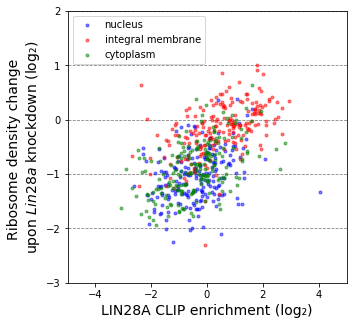

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.scatter(n_CLIP_enrichment,n_Rdensity_change, s=3**2, c='b', alpha=0.5, label='nucleus', zorder=10)
ax.scatter(i_CLIP_enrichment,i_Rdensity_change, s=3**2, c='r', alpha=0.5, label='integral membrane', zorder=10)
ax.scatter(c_CLIP_enrichment,c_Rdensity_change, s=3**2, c='g', alpha=0.5, label='cytoplasm', zorder=10)

plt.grid(True, axis='y', color='k', alpha=0.5, linestyle='--' ,zorder=1)

plt.xlim([-5,5])
plt.ylim([-3,2])

plt.xlabel('LIN28A CLIP enrichment (log\u2082)',fontsize=14)
plt.ylabel('Ribosome density change \nupon $Lin28a$ knockdown (log\u2082)',fontsize=14)

plt.legend(loc='upper left')
plt.savefig('./r_fig5B.png',facecolor='#FFFFFF',bbox_inches='tight')
plt.show()